<a href="https://colab.research.google.com/github/arunravi8595/CE802/blob/main/Assignment/CE802_P2_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [260]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

In [261]:
#Load Data - CE802_P2_Data
dataset = pd.read_csv('https://raw.githubusercontent.com/arunravi8595/CE802/main/CE802_P2_Data.csv')
test_dataset = pd.read_csv('https://raw.githubusercontent.com/arunravi8595/CE802/main/CE802_P2_Test.csv')

In [262]:
dataset.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-1,45,-7.97,0.54,3,0.50,-113.34,20.30,9.99,20.50,-5.52,3.60,-466.22,1.88,-7.49,True
1,1,27,-7.02,1.08,3,0.85,-47.34,20.00,2.88,19.40,-6.49,1.22,-470.22,0.57,NaN,True
2,-2,0,-8.82,0.56,3,0.45,-152.34,19.62,9.78,20.74,-5.21,2.08,-534.22,5.62,-5.74,False
3,-14,855,-3.23,12.00,30,7.45,-341.34,34.76,-10.14,14.38,-4.79,-2.52,-846.22,-4.17,NaN,True
4,-1,39,-8.12,2.88,3,0.76,-53.34,19.08,6.48,22.58,-7.52,1.24,-512.22,2.17,NaN,False


In [263]:
dataset.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
count,1500.000000,1500.00000,1500.000000,1500.00000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,750.000000
mean,-6.638000,327.07400,-5.583260,9.93752,16.21000,3.854280,-88.098000,26.035627,0.224600,16.934107,-6.072353,-2.524933,-605.110667,-0.361213,-7.043013
std,7.159315,352.00374,2.554271,8.65042,13.51472,3.465276,120.565344,6.333818,7.635517,5.027699,1.108964,4.982472,142.833748,2.540644,1.005117
min,-24.000000,0.00000,-13.980000,0.00000,0.00000,0.000000,-431.340000,18.660000,-13.470000,7.980000,-10.310000,-11.540000,-936.220000,-5.020000,-9.400000
25%,-14.000000,45.00000,-7.480000,2.48000,3.00000,0.600000,-143.340000,20.100000,-7.140000,12.120000,-6.650000,-7.280000,-726.220000,-2.840000,-7.790000
50%,-3.000000,150.00000,-6.580000,4.14000,3.00000,1.020000,-104.340000,20.820000,3.195000,18.900000,-5.920000,-0.620000,-534.220000,0.620000,-7.050000
75%,-1.000000,585.00000,-3.087500,16.40000,30.00000,7.050000,-41.340000,31.560000,5.880000,20.820000,-5.420000,1.145000,-494.220000,1.520000,-6.322500
max,2.000000,1170.00000,-1.110000,31.40000,30.00000,10.350000,213.660000,38.960000,25.320000,32.260000,-3.710000,12.940000,-446.220000,8.670000,-4.320000


(array([105.,   4.,   0., 374.,   0.,  13.,   0., 240., 647., 117.]),
 array([-24. , -21.4, -18.8, -16.2, -13.6, -11. ,  -8.4,  -5.8,  -3.2,
         -0.6,   2. ]),
 <a list of 10 Patch objects>)

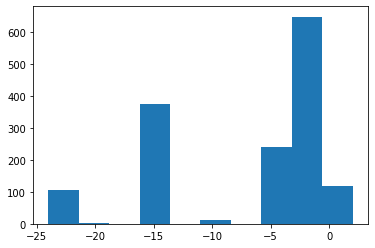

In [264]:
plt.hist(dataset.F1)


In [265]:
dataset.shape

(1500, 16)

In [266]:
dataset.nunique()

F1        11
F2       141
F3       660
F4       400
F5         4
F6       216
F7        80
F8       214
F9       650
F10      656
F11      432
F12      649
F13       91
F14      646
F15      331
Class      2
dtype: int64

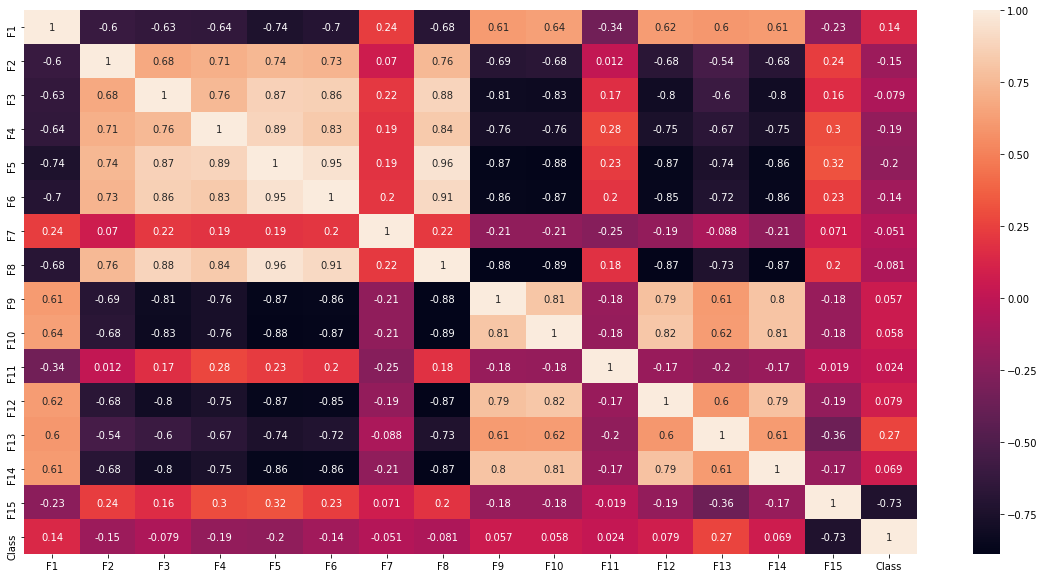

In [267]:
#Plotting Correlation
plt.figure(figsize=(20,10))
correlation=dataset.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

In [268]:
dataset.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

(array([ 22.,  52.,  98., 116., 129., 135., 101.,  69.,  19.,   9.]),
 array([-9.4  , -8.892, -8.384, -7.876, -7.368, -6.86 , -6.352, -5.844,
        -5.336, -4.828, -4.32 ]),
 <a list of 10 Patch objects>)

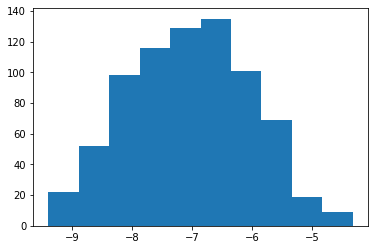

In [269]:
plt.hist(dataset.F15)

In [270]:
# Replace True and false with 0 and 1
cleanup = {"Class": {False:0, True:1}}
dataset.replace(cleanup, inplace=True)

In [271]:
#Calculating missing value with mean value
dataset=dataset.fillna(dataset.mean())
dataset.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
Class    0
dtype: int64

In [272]:
# target data and features seprating 
Input=dataset.iloc[:,0:16]
x = Input.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataset = pd.DataFrame(x_scaled)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.884615,0.038462,0.466977,0.017197,0.1,0.048309,0.493023,0.080788,0.604795,0.515651,0.725758,0.618464,0.959184,0.504018,0.375984,1.0
1,0.961538,0.023077,0.540793,0.034395,0.1,0.082126,0.595349,0.066010,0.421500,0.470346,0.578788,0.521242,0.951020,0.408327,0.463974,1.0
2,0.846154,0.000000,0.400932,0.017834,0.1,0.043478,0.432558,0.047291,0.599381,0.525535,0.772727,0.556373,0.820408,0.777210,0.720472,0.0
3,0.384615,0.730769,0.835276,0.382166,1.0,0.719807,0.139535,0.793103,0.085847,0.263591,0.836364,0.368464,0.183673,0.062089,0.463974,1.0
4,0.884615,0.033333,0.455322,0.091720,0.1,0.073430,0.586047,0.020690,0.514308,0.601318,0.422727,0.522059,0.865306,0.525201,0.463974,0.0


In [273]:
# Rename dataset column
dataset=dataset.rename(columns={0:'F1',1:'F2',2:'F3',3:'F4',4:'F5',5:'F6',6:'F7',7:'F8',8:'F9',9:'F10',10:'F11',11:'F12',12:'F13',13:'F14',14:'F15',15:'Class'})

In [274]:
from sklearn.model_selection import train_test_split
X = dataset.loc[:, dataset.columns != 'Class']
y = dataset.loc[:, dataset.columns == 'Class']

In [275]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# **Decision Tree Model**

In [276]:
# Build Decision Tree  classifier model and train
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [277]:
# Prediction
y_pred = classifier.predict(X_test)

In [278]:
# Confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.75      0.78       250
         1.0       0.72      0.80      0.76       200

    accuracy                           0.77       450
   macro avg       0.77      0.77      0.77       450
weighted avg       0.78      0.77      0.77       450



In [279]:
print(confusion_matrix(y_test, y_pred))

[[188  62]
 [ 41 159]]


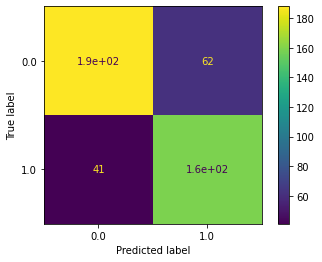

In [280]:
#plotting Confusion matrix
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

# **Random forest classifier**

In [281]:
# Build and train
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=150,max_depth=2, random_state=0)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [282]:
clf.predict(X_test)

array([1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 0., 0.

In [283]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.82      0.75      0.78       250
         1.0       0.72      0.80      0.76       200

    accuracy                           0.77       450
   macro avg       0.77      0.77      0.77       450
weighted avg       0.78      0.77      0.77       450



In [284]:
print(confusion_matrix(y_test, y_pred))

[[188  62]
 [ 41 159]]


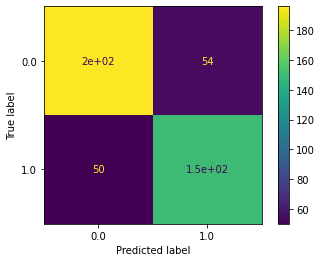

In [285]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

**SVM model**

In [286]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf',C=125)
svclassifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=125, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [287]:
#predicting test data
y_pred = svclassifier.predict(X_test)

In [288]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[226  24]
 [ 21 179]]
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.91       250
         1.0       0.88      0.90      0.89       200

    accuracy                           0.90       450
   macro avg       0.90      0.90      0.90       450
weighted avg       0.90      0.90      0.90       450



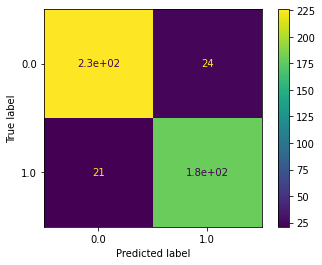

In [289]:
plot_confusion_matrix(svclassifier, X_test, y_test)  
plt.show()

## **Test data**

In [290]:
# Check test data
test_dataset.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,750.000000,0.0
mean,-6.644000,327.896000,-5.517507,10.202187,16.538000,3.895293,-81.150000,26.294107,0.050120,16.833320,-6.182833,-2.921707,-600.034667,-0.492587,-7.076347,NaN
std,7.073138,348.437105,2.534049,8.611866,13.522221,3.438299,124.116235,6.476781,7.693851,4.985787,1.201599,5.057494,137.330172,2.511221,1.014522,NaN
min,-24.000000,0.000000,-14.030000,0.020000,0.000000,0.000000,-416.340000,18.720000,-13.200000,7.300000,-11.110000,-11.660000,-936.220000,-4.920000,-10.540000,NaN
25%,-14.000000,57.000000,-7.420000,2.595000,3.000000,0.620000,-140.340000,20.100000,-7.290000,12.090000,-6.832500,-7.720000,-706.220000,-2.950000,-7.820000,NaN
50%,-4.000000,162.000000,-6.495000,10.200000,30.000000,5.050000,-101.340000,28.560000,3.030000,18.890000,-6.010000,-0.860000,-532.220000,0.460000,-7.075000,NaN
75%,-1.000000,585.000000,-3.050000,16.900000,30.000000,7.000000,-26.340000,32.060000,5.827500,20.640000,-5.427500,0.960000,-494.220000,1.362500,-6.342500,NaN
max,2.000000,1200.000000,-1.070000,31.500000,30.000000,10.300000,213.660000,39.660000,22.170000,30.920000,-3.800000,13.300000,-436.220000,7.410000,-4.150000,NaN


In [291]:
test_dataset.nunique()

F1        11
F2       139
F3       653
F4       397
F5         4
F6       213
F7        77
F8       215
F9       667
F10      645
F11      471
F12      640
F13       93
F14      638
F15      339
Class      0
dtype: int64

In [292]:
# Calculating null values using mean
test_dataset=test_dataset.fillna(dataset.mean())
test_dataset.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
Class    0
dtype: int64

In [293]:
test_dataset.drop("Class",axis=1)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
0,-4,765,-3.72,26.40,30,5.15,18.66,31.06,-4.80,15.18,-5.05,-6.56,-766.22,-1.98,-4.670000
1,-3,3,-7.10,1.20,3,0.36,-119.34,20.00,6.39,19.92,-5.29,0.32,-524.22,2.12,0.463974
2,-4,735,-1.70,14.50,30,6.50,183.66,37.36,-11.88,11.22,-7.79,-9.64,-776.22,-3.88,-6.570000
3,-14,90,-2.55,13.30,30,7.95,-236.34,32.06,-3.09,15.86,-4.33,-8.76,-916.22,-3.41,0.463974
4,-1,174,-7.63,3.74,3,0.94,-143.34,19.58,11.67,19.62,-7.63,1.12,-506.22,3.08,0.463974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-3,81,-7.20,2.60,3,0.97,-125.34,19.32,4.80,19.44,-6.93,0.10,-498.22,1.22,0.463974
1496,1,57,-6.95,2.88,3,0.04,-65.34,20.64,6.87,19.74,-7.63,-0.34,-480.22,2.03,0.463974
1497,-1,63,-6.93,1.30,3,0.66,-125.34,20.06,4.50,22.68,-5.60,7.82,-518.22,2.28,-7.340000
1498,-14,75,-3.16,12.90,30,7.40,-221.34,32.56,-6.60,22.30,-4.03,-7.50,-546.22,-3.40,-8.810000


In [294]:
# split data into features and target
# Normalizing features
Input=test_dataset.iloc[:,0:15]
x = Input.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
test_dataset = pd.DataFrame(x_scaled)
test_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.769231,0.6375,0.795525,0.837992,1.0,0.500000,0.690476,0.589303,0.237489,0.333616,0.829001,0.204327,0.340,0.238443,0.533444
1,0.807692,0.0025,0.534722,0.037484,0.1,0.034951,0.471429,0.061127,0.553859,0.534293,0.796170,0.479968,0.824,0.570965,1.000000
2,0.769231,0.6125,0.951389,0.459975,1.0,0.631068,0.952381,0.890162,0.037320,0.165961,0.454172,0.080929,0.320,0.084347,0.360779
3,0.384615,0.0750,0.885802,0.421855,1.0,0.771845,0.285714,0.637058,0.285835,0.362405,0.927497,0.116186,0.040,0.122466,1.000000
4,0.884615,0.1450,0.493827,0.118170,0.1,0.091262,0.433333,0.041070,0.703138,0.521592,0.476060,0.512019,0.860,0.648824,1.000000


In [295]:
# predicting test data
test_pred=svclassifier.predict(test_dataset)

In [296]:
test_dataset_final=pd.read_csv("https://raw.githubusercontent.com/arunravi8595/CE802/main/CE802_P2_Test.csv")
target = pd.DataFrame({'Class': test_pred[:]})

In [297]:
test_dataset_final['Class']=target

In [298]:
cleanup = {"Class": {0:False,1: True}}
test_dataset_final.replace(cleanup, inplace=True)

In [299]:
# Write into csv
test_dataset_final.to_csv('CE802_P2_Test.csv', encoding='utf-8', index=False)